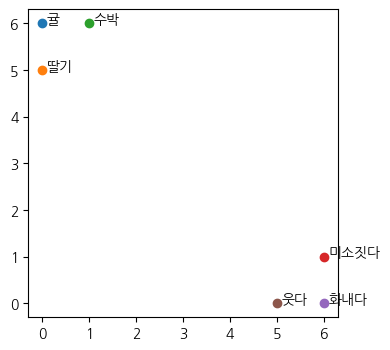

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 한글 폰트 설정
rcParams['font.family'] = 'NanumGothic'

# 단어와 임베딩 벡터 정의
word_embeddings = {
    '귤': np.array([0, 6]),
    '딸기': np.array([0, 5]),
    '수박': np.array([1, 6]),
    '미소짓다': np.array([6, 1]),
    '화내다': np.array([6, 0]),
    '웃다': np.array([5, 0])
}

# 단어 임베딩 시각화
plt.figure(figsize=(4, 4))
for word, vec in word_embeddings.items():
    plt.scatter(*vec)
    plt.text(vec[0] + 0.1, vec[1], word)
plt.show()


In [8]:
def dot_product(vec1, vec2):
    return np.dot(vec1, vec2)

# 예제 단어들 사이의 내적 계산
print("귤 • 딸기:", dot_product(word_embeddings['귤'], word_embeddings['딸기']))
print("귤 • 웃다:", dot_product(word_embeddings['귤'], word_embeddings['웃다']))


귤 • 딸기: 30
귤 • 웃다: 0


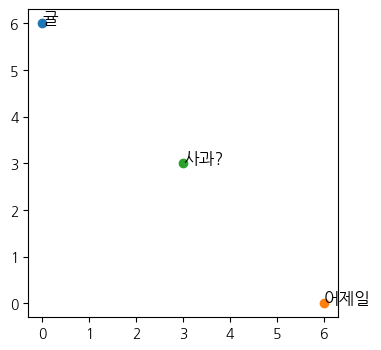

In [38]:
# 귤, 어제일의 벡터값 설정
귤 = np.array([0, 6])
어제일 = np.array([6, 0])

# 사과의 초기 벡터값 설정
사과 = np.array([3, 3])

# 초기 벡터 시각화
initial_word_embeddings = {
    "귤": 귤,
    "어제일": 어제일,
    "사과?": 사과
}

plt.figure(figsize=(4, 4))
for word, vec in initial_word_embeddings.items():
    plt.scatter(*vec)
    plt.text(vec[0], vec[1], word, fontsize=12)
plt.show()


업데이트된 사과 벡터 (사과_과일): [1.2 4.8]
업데이트된 사과 벡터 (사과_행위): [4.35 1.65]


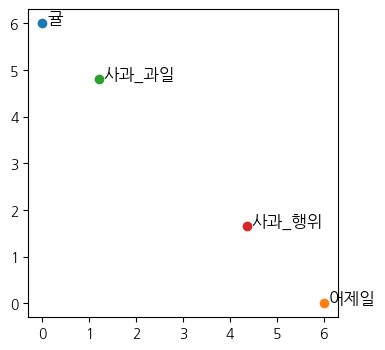

In [40]:
# 내적 계산 함수
def dot_product(v1, v2):
    return np.dot(v1, v2)

# 벡터 업데이트 함수 
def update_vector(vec, target_vec, attention_result): # vec:초기벡터(사과), target_vec:목표벡터(귤or어제일)
    new_vector = vec + attention_result * (target_vec - vec)
    return new_vector

# '사과' 벡터와 '귤'과의 관계를 학습한 결과
attention_result1 = 0.6

# '사과' 벡터와 '어제일'과의 관계를 학습한 결과
attention_result2 = 0.45

# '사과' 벡터와 '귤'사이의 거리 업데이트
사과_과일 = update_vector(사과, 귤, attention_result1)
print(f"업데이트된 사과 벡터 (사과_과일): {사과_과일}")

# '사과' 벡터와 '어제일'사이의 거리 업데이트
사과_행위 = update_vector(사과, 어제일, attention_result2)
print(f"업데이트된 사과 벡터 (사과_행위): {사과_행위}")

# 단어 임베딩 시각화
word_embeddings = {
    "귤": 귤,
    "어제일": 어제일,
    "사과_과일": 사과_과일,
    "사과_행위": 사과_행위
}

plt.figure(figsize=(4, 4))
for word, vec in word_embeddings.items():
    plt.scatter(*vec)
    plt.text(vec[0] + 0.1, vec[1], word, fontsize=12)

plt.show()